In [145]:
pip install keras 

In [146]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [232]:
from scipy.io import arff
import pandas as pd
import os
import random
import numpy as np
import seaborn as sns
from pandas.api.types import CategoricalDtype
import matplotlib as mpl
import matplotlib.pyplot as plt

import keras
import tensorflow 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [233]:
data1 = arff.loadarff(r'C:\Users\x\Desktop\Acc Data\1year.arff')
data2 = arff.loadarff(r'C:\Users\x\Desktop\Acc Data\2year.arff')
data3 = arff.loadarff(r'C:\Users\x\Desktop\Acc Data\3year.arff')
data4 = arff.loadarff(r'C:\Users\x\Desktop\Acc Data\4year.arff')
data5 = arff.loadarff(r'C:\Users\x\Desktop\Acc Data\5year.arff')

In [234]:
df1 = pd.DataFrame(data1[0])
df2 = pd.DataFrame(data2[0])
df3 = pd.DataFrame(data3[0])
df4 = pd.DataFrame(data4[0])
df5 = pd.DataFrame(data5[0])

In [235]:
df1.isnull().sum().sum()

5835

In [236]:
df1_m = df1.fillna(df1.mean())
df2_m = df2.fillna(df2.mean())
df3_m = df3.fillna(df3.mean())
df4_m = df4.fillna(df4.mean())
df5_m = df5.fillna(df5.mean())

In [237]:
df1_m.isnull().sum().sum()

0

In [238]:
df5


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.5200,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,b'0'
1,-0.006202,0.48465,0.232980,1.59980,6.1825,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,b'0'
2,0.130240,0.22142,0.577510,3.60820,120.0400,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,b'0'
3,-0.089951,0.88700,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,b'0'
4,0.048179,0.55041,0.107650,1.24370,-22.9590,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [239]:
all_data = pd.concat([df1_m, df2_m, df3_m, df4_m],axis=0, ignore_index=True)
all_data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.388250,0.249760,1.33050,1.13890,0.50494,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.000000,0.258340,0.99601,1.69960,0.49788,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.000000,0.309060,0.43695,1.30900,0.30408,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.149880,0.092704,1.86610,1.05710,0.57353,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.187320,0.187320,0.63070,1.15590,0.38677,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37490,0.004676,0.54949,0.192810,1.38990,-39.0640,0.004676,0.013002,0.78627,0.97093,0.43205,...,-0.029937,0.010823,1.02990,0.127190,3.8159,3.3892,146.860,2.4854,3.93150,b'1'
37491,-0.027610,0.60748,-0.029762,0.90591,-20.9230,-0.027610,-0.027610,0.55161,1.00730,0.33509,...,0.007198,-0.082395,0.99280,0.868910,23.0280,27.1360,37.047,9.8523,4.36810,b'1'
37492,-0.238290,0.62708,0.090374,1.61250,-1.0692,-0.238290,-0.240360,0.28322,0.80307,0.17760,...,-0.245220,-1.341700,1.24520,2.700100,6.5694,4.1781,88.883,4.1065,0.79501,b'1'
37493,0.097188,0.75300,-0.327680,0.43850,-214.2400,-0.331300,0.104280,0.32803,0.98145,0.24700,...,0.288240,0.393470,0.68127,0.508850,4.3246,35.5030,217.030,1.6818,1.31910,b'1'


In [240]:
all_data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,37495.000000,37495.000000,37495.000000,37495.000000,3.749500e+04,37495.000000,37495.000000,37495.000000,37495.000000,37495.000000,...,3.749500e+04,3.749500e+04,37495.000000,3.749500e+04,37495.000000,3.749500e+04,37495.000000,3.749500e+04,37495.000000,37495.000000
mean,0.044220,0.609923,0.102658,6.537705,-4.492351e+02,-0.068497,0.125859,13.723616,2.819855,0.639756,...,7.176408e+03,-3.027562e+01,0.029404,3.455783e+01,1.499382,3.738593e+02,17.995627,1.698678e+03,9.376120,73.523357
std,2.095472,5.856470,5.833120,315.300016,6.526921e+04,6.655396,4.984758,542.193370,67.699876,15.616390,...,6.842053e+04,5.724003e+03,12.764459,5.733928e+03,131.344009,2.306159e+04,594.113025,1.496005e+05,126.992357,2379.359875
min,-256.890000,-72.162000,-479.960000,-0.045319,-1.190300e+07,-508.410000,-189.560000,-141.410000,-1.215700,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,0.000000e+00,-12.656000,-2.336500e+06,-0.367890,-10677.000000
25%,0.003351,0.270940,0.018387,1.044300,-5.015950e+01,0.000000,0.005775,0.423805,1.019200,0.291805,...,2.079250e+01,8.604950e-03,0.014480,8.752800e-01,0.000000,5.784200e+00,4.548900,4.179950e+01,3.106300,2.214550
50%,0.050144,0.474800,0.193110,1.560200,-1.363900e+00,0.000000,0.060209,1.061600,1.208700,0.503210,...,1.004900e+03,5.256900e-02,0.121420,9.512900e-01,0.006513,1.056800e+01,6.732300,7.108700e+01,5.136300,4.413200
75%,0.131480,0.692105,0.400620,2.780200,5.089250e+01,0.086255,0.153285,2.605400,2.104900,0.707375,...,4.650300e+03,1.292550e-01,0.291350,9.931500e-01,0.242000,2.457000e+01,10.634000,1.175450e+02,8.689100,10.557000
max,94.280000,480.960000,22.769000,53433.000000,1.034100e+06,322.200000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,3.660200e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [241]:
X = all_data.iloc[:,:64].values
Y = all_data.iloc[:,64].values  

In [242]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y) 
Y = np_utils.to_categorical(Y)   

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2) 
#change random state
# Neden 42? Araştırdığım kaynaklarda bunun nedeninin Otostopçunun Galaksi 
# Rehberinde hayatın anlamını uzun hesaplamalar sonucu 42 bulan süper bilgisayardan esinlenmiş olduğu yazıyor.

In [244]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [245]:
def build_model():
    model = Sequential()
    model.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'uniform', input_shape = (64,)))
    model.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'uniform'))
    model.add(Dense(units = 2, activation = 'sigmoid', kernel_initializer = 'uniform'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [246]:
classifier = build_model()

In [307]:
history_callback = classifier.fit(X_train,y_train, validation_split=0.25, epochs=100)

Epoch 1/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0906 - accuracy: 0.9718 - val_loss: 0.0904 - val_accuracy: 0.9708
Epoch 2/100
704/704 [==============================] - 2s 2ms/step - loss: 0.0912 - accuracy: 0.9719 - val_loss: 0.0995 - val_accuracy: 0.9697
Epoch 3/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0916 - accuracy: 0.9723 - val_loss: 0.0973 - val_accuracy: 0.9716
Epoch 4/100
704/704 [==============================] - 2s 2ms/step - loss: 0.0891 - accuracy: 0.9723 - val_loss: 0.1004 - val_accuracy: 0.9701
Epoch 5/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0892 - accuracy: 0.9725 - val_loss: 0.1077 - val_accuracy: 0.9677
Epoch 6/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0907 - accuracy: 0.9718 - val_loss: 0.1007 - val_accuracy: 0.9700
Epoch 7/100
704/704 [==============================] - 2s 3ms/step - loss: 0.0884 - accuracy: 0.9731 - val_loss: 0.1017 - val_accuracy: 0.9703

In [308]:
acc_history = history_callback.history["accuracy"]
loss,accuracy = classifier.evaluate(X_test,y_test)

235/235 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9665


In [318]:
acc_history_val = history_callback.history["val_accuracy"]
loss_val, acc_history_val = classifier.evaluate(X_train, y_train)

938/938 [==============================] - 2s 2ms/step - loss: 0.1127 - accuracy: 0.9734


In [285]:
#df5.drop('class',axis=1, inplace=True)

In [309]:
df_g= df5.sample(1).values
df_g

array([[-3.5348e-02,  3.8943e-01,  1.5040e-03,  1.0083e+00, -4.5037e+01,
         1.2295e-01, -4.0561e-02,  1.5599e+00,  1.0028e+00,  6.0749e-01,
        -4.0561e-02, -2.2344e-01,  2.1358e-02, -4.0561e-02,  5.7650e+03,
         6.3313e-02,  2.5678e+00, -4.0561e-02, -3.5135e-02,  4.2475e+01,
         8.8821e-01, -2.9808e-02, -3.0619e-02,  1.5882e-01,  6.0749e-01,
         7.6699e-02, -2.5893e-01,  1.8410e-03,  4.0512e+00,  3.3216e-01,
        -3.5135e-02,  5.7557e+01,  6.3416e+00, -7.6542e-02, -2.9808e-02,
         1.1710e+00,  2.3421e-01,  8.1539e-01, -2.5820e-02,  4.9529e-02,
         3.6158e-01, -2.5820e-02,  5.5027e+01,  1.2553e+01, -2.6312e-01,
         2.6824e-01,  4.2595e+01, -9.5025e-02, -8.2313e-02,  4.7000e-01,
         1.8153e-01,  1.5769e-01,  7.4359e-01,  9.9807e-01,  1.6920e+01,
         2.8190e-03, -5.8187e-02,  9.9718e-01,  3.4223e-01,  8.5934e+00,
         2.9078e+01,  5.7394e+01,  6.3595e+00,  1.4131e+00]])

In [310]:
guess = df5.sample(1).values
guess = np.asarray(guess).astype('float32')
y_pred = classifier.predict(guess)

In [311]:
y_pred

array([[0., 1.]], dtype=float32)

In [312]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

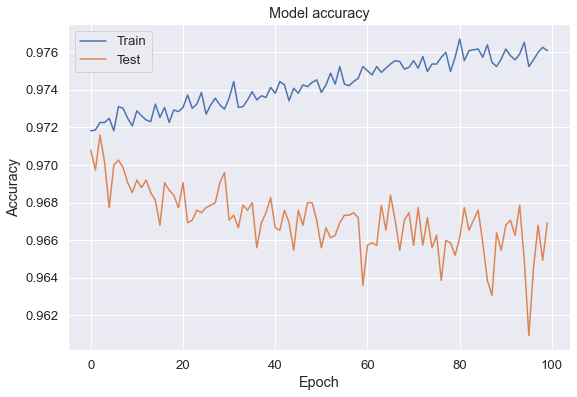

In [314]:
plt.figure(figsize = (9,6))
plt.plot(history_callback.history['accuracy'])
plt.plot(history_callback.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


In [325]:
# Z-Score Model 

In [36]:
year1 = df1_m[['Attr3', 'Attr6', 'Attr7', 'Attr8', 'Attr9']]
year2 = df2_m[['Attr3', 'Attr6', 'Attr7', 'Attr8', 'Attr9']]
year3 = df3_m[['Attr3', 'Attr6', 'Attr7', 'Attr8', 'Attr9']]
year4 = df4_m[['Attr3', 'Attr6', 'Attr7', 'Attr8', 'Attr9']]
year5 = df5_m[['Attr3', 'Attr6', 'Attr7', 'Attr8', 'Attr9']]

In [8]:
Z_score_datas = pd.concat([year1,year2,year3,year4],axis=0, ignore_index=True)

In [139]:
A, B, C, D, E  = year2['Attr3'], year2['Attr6'], year2['Attr7'], year2['Attr8'], year2['Attr9']
zs2_year = A*(1.2) + B*(1.4) + C*(3.3) + D*(0.6) + E*(1)

Zs_year2 = pd.ExcelWriter('zs2_year.xlsx')
zs2_year.to_excel(Zs_year2, index=False)
 
Zs_year2.save()

In [9]:
Z_score_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37495 entries, 0 to 37494
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr3   37495 non-null  float64
 1   Attr6   37495 non-null  float64
 2   Attr7   37495 non-null  float64
 3   Attr8   37495 non-null  float64
 4   Attr9   37495 non-null  float64
dtypes: float64(5)
memory usage: 1.4 MB


In [69]:
corr = Z_score_datas.corr()
corr.style.background_gradient(cmap ='Greys')

,Attr3,Attr6,Attr7,Attr8,Attr9
Attr3,1.000000,0.887425,0.035655,0.001200,-0.002849
Attr6,0.887425,1.000000,0.075532,0.000607,0.018759
Attr7,0.035655,0.075532,1.000000,-0.000471,0.676931
Attr8,0.001200,0.000607,-0.000471,1.000000,0.003602
Attr9,-0.002849,0.018759,0.676931,0.003602,1.000000


In [67]:
A, B, C, D, E  = Z_score_datas['Attr3'], Z_score_datas['Attr6'], Z_score_datas['Attr7'], Z_score_datas['Attr8'], Z_score_datas['Attr9']

In [83]:
z1_s = A*(1.2) + B*(1.4) + C*(3.3) + D*(0.6) + E*(1)
z1_s[z1_s >8]

7          25.226498
50          8.194379
53          8.724388
61          8.946705
75        227.724926
            ...     
37423      10.457001
37426    1672.556289
37453      11.386313
37475     231.352481
37477       8.633598
Length: 3347, dtype: float64